In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()





In [2]:
# Dataset info
print(data.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# Independent variables (input)
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
# Output variable
target = pd.DataFrame(data.target, columns=["MEDV"])
y = target ["MEDV"]

In [ ]:

### Model with all variables
#X = df[["RM", "LSTAT"]]
X = df # all variables

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


In [ ]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


In [7]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

r2:  0.5326761038184187 mae:  0.6093692853948147


<Axes: >

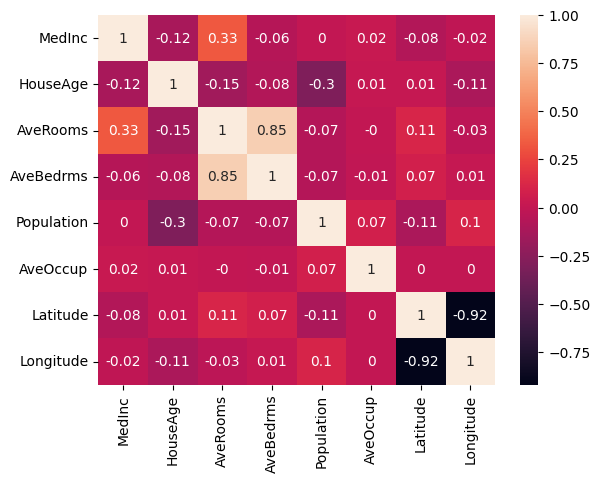

In [8]:
# Correlation
import seaborn as sns
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [9]:
### Model with scikit-learn
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# Model
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


In [11]:

# Prediction of values
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_test = y_test.values.reshape(-1, 1)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)


r2:  0.5943232652466202 mae:  0.5289841670367209
